In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from rdflib import Graph
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import bipartite
from datetime import datetime

In [33]:
dep = pd.read_csv('data/final_dep_18.csv')
dep['id'] = dep['id'].astype(str)

In [34]:
vot_1 = pd.read_csv('data/votazione_1_18.csv')
vot_1.columns = ['votazione', 'titolo', 'descrizione', 'numeroVotazione', 'cognome',
       'nome', 'voto_1', 'infoAssenza', 'deputato'] #change name of the columns 'Espressione' in a meaningful one

#extract id from the link
a = []
for i in range(vot_1.shape[0]):
    a.append(vot_1['deputato'][i][40:46])

vot_1['id'] = a
vot_1.drop('deputato', inplace= True, axis = 1)

merged = pd.merge(dep[['Parlamentare', 'id', 'Partito']], vot_1[['id', 'voto_1']], how = 'left') #first merge

In [38]:
vot_2 = pd.read_csv('data/votazione_2_18.csv', sep = ';')[['Parlamentare', 'Espressione']]

c = []
p = []

#extract name and political group
for i in vot_2['Parlamentare']:
    r = i.split()
    c.append(r[0] + ' ' + r[1].upper())
    p.append(r[2])
    
vot_2['Parlamentare'] = c
vot_2['Partito'] = p

vot_2.columns = ['Parlamentare', 'voto_2', 'Partito'] #change name of the columns 'Espressione' in a meaningful one

merged = pd.merge(merged, vot_2[['Parlamentare', 'voto_2']], how = 'left') #second merge

In [39]:
import missingno as msno

<Axes: >

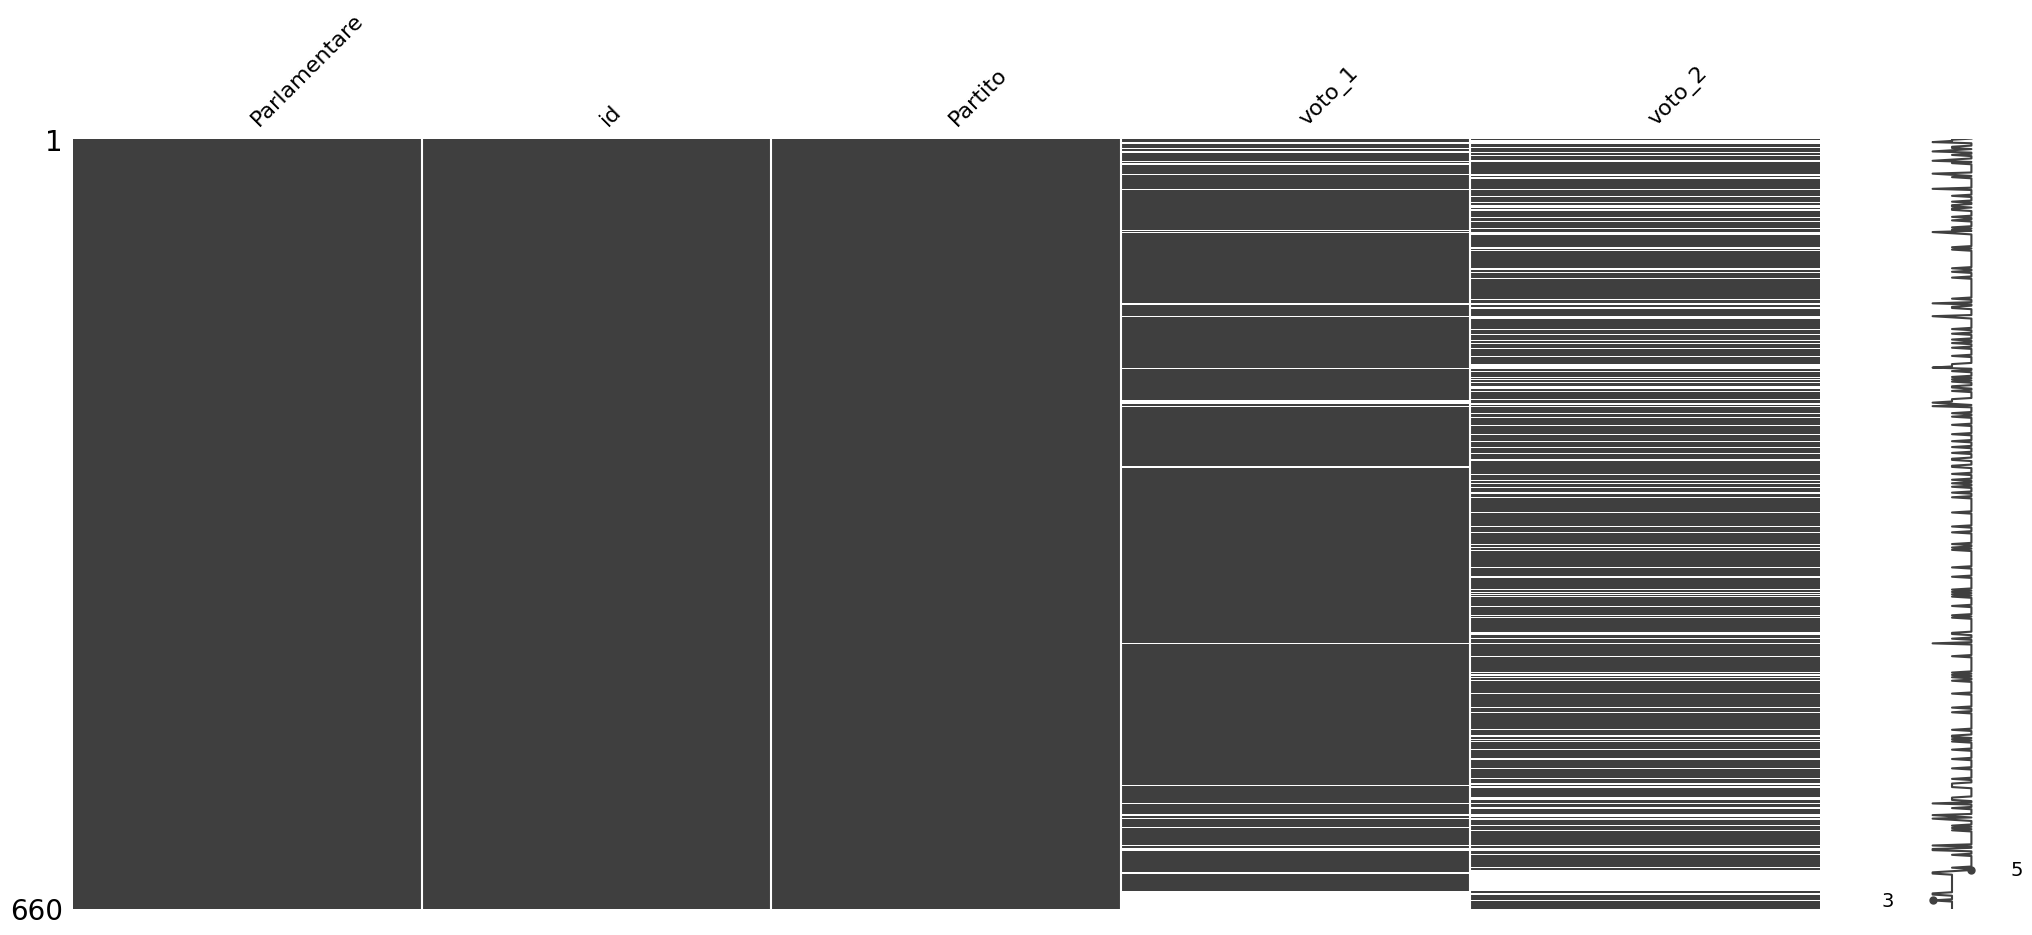

In [40]:
msno.matrix(merged)

In [41]:
merged.fillna('Assente', inplace= True)
print(np.unique(merged['voto_1']))
np.unique(merged['voto_2'])

['Assente' 'Astensione' 'Contrario' 'Favorevole' 'Non ha votato']


array(['Assente', 'Contrario', 'Favorevole', 'In missione'], dtype=object)

In [42]:
dizionario_espressioni = {'Favorevole' : '1', 'Contrario': '-1', 'Assente': '0', 'Astensione': '-1', 'In missione': '0', 'Non ha votato': -1}
merged['voto_1'] = merged['voto_1'].map(dizionario_espressioni)
merged['voto_2'] = merged['voto_2'].map(dizionario_espressioni)

In [43]:
cosine_similarity(merged[['voto_1', 'voto_2']])

array([[1.        , 0.70710678, 0.70710678, ..., 0.        , 0.        ,
        0.70710678],
       [0.70710678, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])